<a href="https://colab.research.google.com/github/tanisaur/ML_zoomcamp/blob/main/ML_Homework_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#read in libraries for machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

--2024-10-09 19:05:33--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv’

laptops.csv         100%[===================>] 291.58K  --.-KB/s    in 0.04s   

2024-10-09 19:05:33 (7.24 MB/s) - ‘laptops.csv’ saved [298573/298573]



Read in data

In [ ]:
df = pd.read_csv('laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


Normalize the names of columns

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [ ]:
#only use the following columns from df 'ram', 'storage', 'screen', 'final_price'
df = df[['ram', 'storage', 'screen', 'final_price']]
df.head()


,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


In [ ]:
#Does the final_price variable have a long tail?
#graph the describe()
df.final_price.describe()

,final_price
count,2160.000000
mean,1312.638509
std,911.475417
min,201.050000
25%,661.082500
50%,1031.945000
75%,1708.970000
max,7150.470000


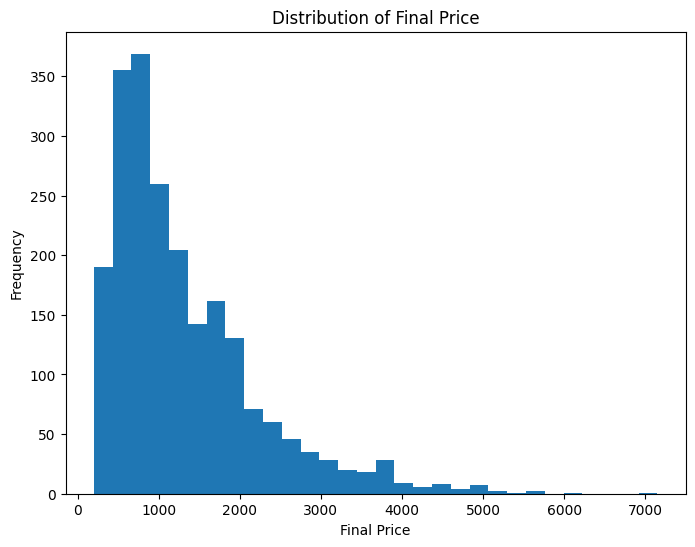

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df.final_price, bins=30)
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.title('Distribution of Final Price')
plt.show()


Yes, the final_price varaible has a long tail.

##Question 1
There's one column with missing values. What is it?

In [ ]:
#find missing values in columns
df.isnull().sum()

,0
ram,0
storage,0
screen,4
final_price,0


##Question 2
What's the median (50% percentile) for variable 'ram' ?

In [ ]:
df.ram.describe()

,ram
count,2160.000000
mean,15.413889
std,9.867815
min,4.000000
25%,8.000000
50%,16.000000
75%,16.000000
max,128.000000


##Prepare and split the dataset

Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [ ]:
#get the length of the dataframe
n = len(df)

#return a whole number
n_val = int(0.2 * n)
n_test = int(0.2 * n)
#this ensures this adds up to 60%
n_train = n - (n_val + n_test)

In [ ]:
#seed is used to make it reproducible across machines
np.random.seed(42)

#length of the dataframe
n = len(df)


n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

#its a good idea to shuffle your data sometimes there is order
idx = np.arange(n)
np.random.shuffle(idx)


df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

#double check your training data len
#to see if it corresponds to your initial numbers
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [27]:
df_train.head()

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


In [29]:
#apply log transformation to final_price
y_train_orig = df_train.final_price.values
y_val_orig = df_val.final_price.values
y_test_orig = df_test.final_price.values

y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

#remember to delete so you dont accidently use it while training
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

Question 3

    We need to deal with missing values for the column from Q1.
    We have two options: fill it with 0 or with the mean of this variable.
    Try both options. For each, train a linear regression model without regularization using the code from the lessons.
    For computing the mean, use the training only!
    Use the validation dataset to evaluate the models and compare the RMSE of each option.
    Round the RMSE scores to 2 decimal digits using round(score, 2)
    Which option gives better RMSE?

Options:

    With 0
    With mean
    Both are equally good


In [ ]:
#fill missing values for the 'screen' column with 0
df.fillna(0, inplace=True)
df.isnull().sum()

,0
ram,0
storage,0
screen,0
final_price,0


In [28]:
df_train.iloc[0]

,2079
ram,32.00
storage,1000.00
screen,15.60
final_price,1123.29


In [ ]:
#filed with 0 LRM without regularization

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0]) #creates a vector of 1s
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [25]:
def prepare_X_0(df):
  df_num = df
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [30]:
X_train = prepare_X_0(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [31]:
y_pred = w_0 + X_train.dot(w)

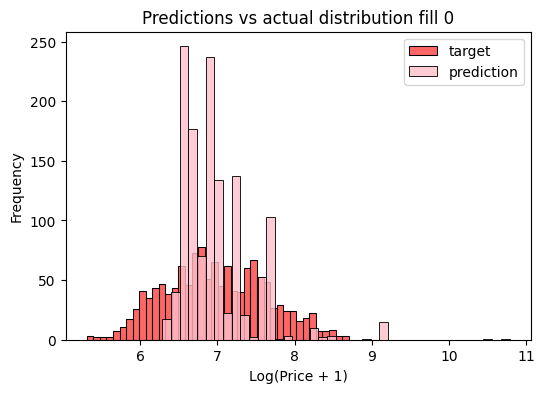

In [32]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='red', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='pink', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution fill 0')

plt.show()

In [43]:
def rmse(y, y_pred):
  error = y_pred - y
  mse = (error ** 2).mean()
  return np.sqrt(mse)

In [44]:
print('Training')
score = rmse(y_train, y_pred)
round(score, 2)

Training


0.45

In [45]:
X_val = df_val
y_pred = w_0 + X_val.dot(w)
print('Validation RMSE 0')
score = rsme(y_val, y_pred)
round(score, 2)

Validation RMSE 0


0.43

With mean

In [46]:
def prepare_X(df):
  df = df.copy()
  df_mean = df.fillna(df.mean())
  X = df_mean.values
  return X

In [47]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred))

train 0.4460856669097624
validation 0.43117372937296844


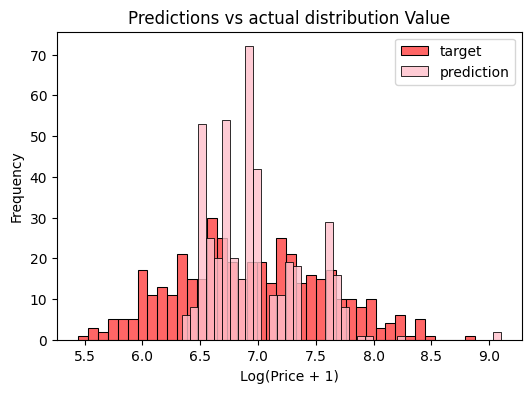

In [48]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color='red', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='pink', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution Value')

plt.show()

Question 4

    Now let's train a regularized linear regression.
    For this question, fill the NAs with 0.
    Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
    Use RMSE to evaluate the model on the validation dataset.
    Round the RMSE scores to 2 decimal digits.
    Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

    0
    0.01
    1
    10
    100


In [49]:
#fill NAs with 0
def prepare_X_0(df):
  df_num = df
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [50]:
def train_linear_regression_reg(X, y, r=0.0):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  reg = r * np.eye(XTX.shape[0])
  XTX = XTX + reg

  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  return w[0], w[1:]

In [51]:
#train with NAs filled with 0
X_train = prepare_X_0(df_train)

In [55]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
  w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
  y_pred = w_0 + X_val.dot(w)
  print('%6s' %r, rmse(y_val, y_pred))

     0 0.43077675120957515
  0.01 0.43075240762135986
   0.1 0.43055557127945393
     1 0.43045325982122296
     5 0.4489414793381812
    10 0.4777717173057293
   100 0.5956709037501913


Question 5

    We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
    Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
    For each seed, do the train/validation/test split with 60%/20%/20% distribution.
    Fill the missing values with 0 and train a model without regularization.
    For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
    What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
    Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

    19.176
    29.176
    39.176
    49.176


In [57]:
# Set the random seeds
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Create an empty list to store RMSE scores for each seed
rmse_scores = []


# Assuming you have your dataset loaded into a DataFrame called 'df'
# Fill missing values with 0
df_filled = df.fillna(0)

n = len(df)

# Loop over each random seed
for seed in seeds:
    # Split the data into train/validation/test sets (60%, 20%, 20%)
    #length of the dataframe



    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    #its a good idea to shuffle your data sometimes there is order
    idx = np.arange(n)
    np.random.shuffle(idx)


    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    #apply log transformation to final_price
    y_train_orig = df_train.final_price.values
    y_val_orig = df_val.final_price.values
    y_test_orig = df_test.final_price.values

    y_train = np.log1p(df_train.final_price.values)
    y_val = np.log1p(df_val.final_price.values)
    y_test = np.log1p(df_test.final_price.values)

    #remember to delete so you dont accidently use it while training
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    # Train a linear regression model
    w_0, w = train_linear_regression(X_train, y_train)

    #TODO: train on X validation set
    # Make predictions on the validation set
    y_pred = w_0 + X_train.dot(w)

    #change to y_val set
    # Calculate the RMSE score for this seed
    rms = rmse(y_train, y_pred)

    # Append the RMSE score to the list
    rmse_scores.append(rms)

# Print RMSE scores for each seed
for seed, rmse_score in zip(seeds, rmse_scores):
    print(f"Seed {seed}: RMSE = {rmse_score:.2f}")

print(rmse_scores)

print(round(np.std(rmse_scores), 3))

Seed 0: RMSE = 0.65
Seed 1: RMSE = 0.65
Seed 2: RMSE = 0.65
Seed 3: RMSE = 0.65
Seed 4: RMSE = 0.65
Seed 5: RMSE = 0.65
Seed 6: RMSE = 0.64
Seed 7: RMSE = 0.65
Seed 8: RMSE = 0.64
Seed 9: RMSE = 0.65
[0.6537768506637495, 0.6498954707968745, 0.6545232235790964, 0.6496934008769372, 0.646145479856548, 0.6509738342217517, 0.6446924264135938, 0.6519992239672641, 0.6418982309943659, 0.6501826934925143]
0.004




Question 6

    Split the dataset like previously, use seed 9.
    Combine train and validation datasets.
    Fill the missing values with 0 and train a model with r=0.001.
    What's the RMSE on the test dataset?

Options:

  
    598.60
    608.60
    618.60
    628.60




In [59]:
np.random.seed(9)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


In [60]:
y_train_orig = df_train.final_price.values
y_val_orig = df_val.final_price.values
y_test_orig = df_test.final_price.values

y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [61]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [62]:
def prepare_X(df):
    df_num = df
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [68]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('test', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

test 0.44154368285395235
val 0.40840334262399886
